In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
Bai1=pd.read_csv("Mall_Customers_2.csv")
Bai1=Bai1.sort_values(by="Age")
Bai1.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
114,115,Female,18.0,65,48.0
91,92,Male,18.0,59,41.0
65,66,Male,18.0,48,59.0
33,34,Male,18.0,33,92.0
0,1,Male,19.0,15,39.0


In [115]:
Bai1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 114 to 186
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     195 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  197 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.4+ KB


In [117]:
# điền dữ liệu bị thiếu
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(missing_values=np.nan,strategy='mean') 
Bai1.loc[:,['Age', 'Spending Score(1-100)']] = Imputer.fit_transform(Bai1.loc[:, ['Age', 'Spending Score (1-100)']].values)

Text(0, 0.5, 'Age')

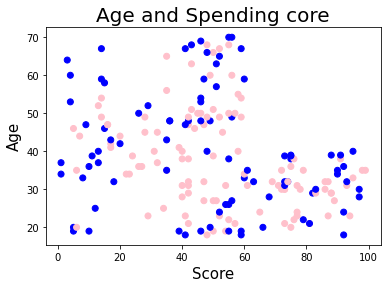

In [119]:
# Vẽ biểu đồ scatter

# Tạo dict lưu nam có màu xanh, nữ màu hồng
color_lb={"Male":"blue","Female":"pink"}

# Lấy tuổi
Ages=Bai1["Age"]

# Lấy điểm
Score=Bai1["Spending Score (1-100)"]

# Tạo 1 list màu dựa theo giới tính trong bảng
Color_gt=["blue" if i == "Male" else "pink" for i in Bai1["Genre"]]

# Vẽ biểu đồ trục x là điểm, trục y là tuổi 
plt.scatter(Score,Ages,c=Color_gt);

# đặt tên cho biểu đồ và 2 trục
plt.title("Age and Spending core",fontdict={"fontsize":20})
plt.xlabel("Score",fontdict={"fontsize":15})
plt.ylabel("Age",fontdict={"fontsize":15})


In [120]:
Salary=Bai1["Annual Income (k$)"]
Max_Salary=max(Salary)
# Tìm độ tuổi có thu nhập cao nhất
Age_MS = [Ages[i] for i,value in enumerate(Salary) if value == Max_Salary]

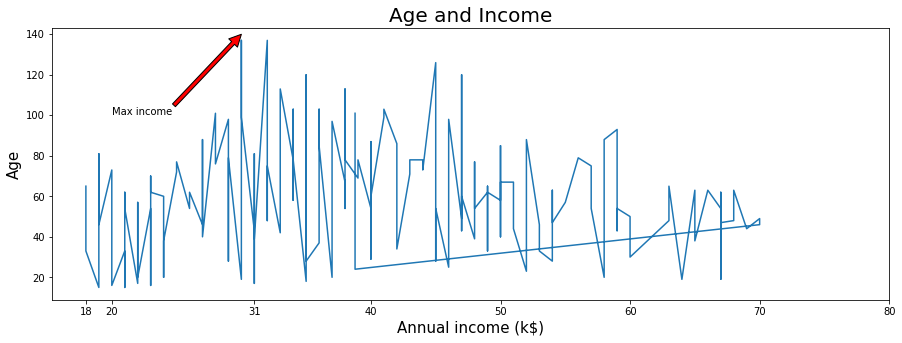

In [112]:
# Chỉnh kích thước
plt.figure(figsize=(15,5));

# Vẽ biểu đồ đường.
plt.plot(Ages,Salary);
# đặt tên cho 2 trục và tên biểu đồ
plt.ylabel("Age",fontdict={"fontsize":15})
plt.xlabel("Annual income (k$)",fontdict={"fontsize":15})
plt.title("Age and Income",fontdict={"fontsize":20})

# vẽ mũi tên
plt.annotate("Max income",xy=(30,140),xytext=(20,100),arrowprops=dict(facecolor="red"));

# hiển thị các độ tuổi của trục y
x_cols= [18,20,31,40,50,60,70,80]
plt.xticks (x_cols);


In [ ]:
Bài 2

In [161]:
Bai2=pd.read_csv("Social_Network_Ads_2.csv")
Bai2

,Age,EstimatedSalary,Purchased
0,19,19000.0,0.0
1,35,20000.0,0.0
2,26,43000.0,0.0
3,27,57000.0,0.0
4,19,76000.0,0.0
...,...,...,...
395,46,41000.0,1.0
396,51,23000.0,1.0
397,50,20000.0,1.0
398,36,33000.0,0.0


In [162]:
Bai2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  397 non-null    float64
 2   Purchased        398 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [163]:
Bai2.isnull().sum()

Age                0
EstimatedSalary    3
Purchased          2
dtype: int64

In [164]:
# xử lý dữ liệu bị mất
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
Bai2.iloc[:,1:3] = imputer.fit_transform(Bai2.iloc[:,1:3])

In [165]:
#đổi 1 thành đã mua và 0 thành chưa mua
Bai2["Purchased"] =Bai2["Purchased"].apply(lambda x : "Đã mua" if x == 1.0 else "Chưa mua")
Bai2

,Age,EstimatedSalary,Purchased
0,19,19000.0,Chưa mua
1,35,20000.0,Chưa mua
2,26,43000.0,Chưa mua
3,27,57000.0,Chưa mua
4,19,76000.0,Chưa mua
...,...,...,...
395,46,41000.0,Đã mua
396,51,23000.0,Đã mua
397,50,20000.0,Đã mua
398,36,33000.0,Chưa mua


In [166]:
# Đổi tên cột Purchased
Bai2.rename(columns={"Purchased":"Status"},inplace=True)
Bai2

,Age,EstimatedSalary,Status
0,19,19000.0,Chưa mua
1,35,20000.0,Chưa mua
2,26,43000.0,Chưa mua
3,27,57000.0,Chưa mua
4,19,76000.0,Chưa mua
...,...,...,...
395,46,41000.0,Đã mua
396,51,23000.0,Đã mua
397,50,20000.0,Đã mua
398,36,33000.0,Chưa mua


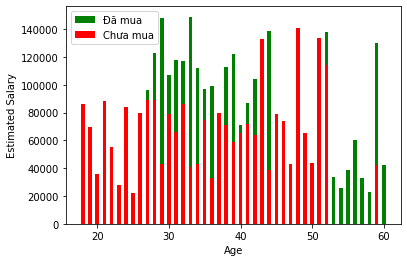

In [188]:
# tách lấy thông tin đã mua và chưa mua
nbuy= {row['Age']:row['EstimatedSalary'] for i, row in Bai2.iterrows() if row['Status']=='Chưa mua'}
buy = {row['Age']:row['EstimatedSalary'] for i, row in Bai2.iterrows() if row['Status']=='Đã mua'}
# vẽ biểu đồ
w=0.5
plt.bar(buy.keys(),buy.values(),w,color='green',label="Đã mua");
plt.bar(nbuy.keys(), nbuy.values(), w, color='red', label='Chưa mua');
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

Text(0, 0.5, 'Salary')

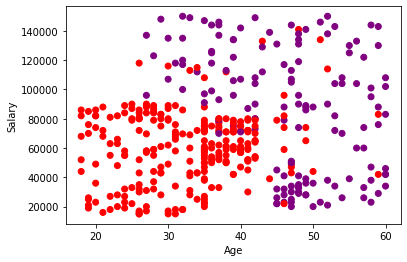

In [186]:
color = ['purple' if i== "Đã mua" else 'red' for i in Bai2["Status"]]
# vẽ biểu đồ
plt.scatter(Bai2['Age'],Bai2['EstimatedSalary'],c=color)
plt.xlabel("Age")
plt.ylabel("Salary")